In [1]:
import numpy as np
import pandas as pd 
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt


In [33]:
def option_chains(ticker): 
    #define tickers that identifies publically an asset (stock,bonds, futures, options)
    asset=yf.Ticker(ticker)

    #Retrieve expiration dates of options 
    expirations=asset.options

    #Create an Empty DataFrame to store option chains data
    chains=pd.DataFrame()


    for expiration in expirations: 

        #For the specified expiration date return the options data (bid, ask prices etc..)
        opt=asset.option_chain(expiration)

        #Extract call prices for the corresponding options: 
        calls=opt.calls
        calls['optionType']="call"

        puts=opt.puts
        puts['optionType']="put"

        chain=pd.concat([calls,puts])
        chain['expiration']=(pd.to_datetime(expiration)+\
                             pd.DateOffset(hours=23,minutes=59,seconds=59))
        chains=pd.concat([chains,chain])
    chains['DaysToExpiration']=(chains.expiration-dt.datetime.today()).dt.days+1
    return chains



In [56]:
options=option_chains('SPY')
calls=options[options['optionType']== 'call']
puts=options[options['optionType']== 'put']


In [50]:
calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expiration,DaysToExpiration
0,SPY230608C00340000,2023-06-02 16:42:44+00:00,340.0,87.85,0.0,0.0,0.0,0.0,2.0,2.0,0.000010,True,REGULAR,USD,call,2023-06-08 23:59:59,1
1,SPY230608C00350000,2023-06-05 16:05:05+00:00,350.0,78.87,0.0,0.0,0.0,0.0,15.0,33.0,0.000010,True,REGULAR,USD,call,2023-06-08 23:59:59,1
2,SPY230608C00352000,2023-06-02 15:29:23+00:00,352.0,75.89,0.0,0.0,0.0,0.0,20.0,10.0,0.000010,True,REGULAR,USD,call,2023-06-08 23:59:59,1
3,SPY230608C00360000,2023-06-07 19:58:19+00:00,360.0,66.64,0.0,0.0,0.0,0.0,2.0,2.0,0.000010,True,REGULAR,USD,call,2023-06-08 23:59:59,1
4,SPY230608C00370000,2023-06-07 14:10:51+00:00,370.0,59.18,0.0,0.0,0.0,0.0,1.0,58.0,0.000010,True,REGULAR,USD,call,2023-06-08 23:59:59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,SPY251219C00630000,2023-05-18 16:45:38+00:00,630.0,4.71,0.0,0.0,0.0,0.0,1.0,6.0,0.062509,False,REGULAR,USD,call,2025-12-19 23:59:59,926
93,SPY251219C00635000,2023-05-26 19:19:04+00:00,635.0,2.36,0.0,0.0,0.0,0.0,3.0,8.0,0.062509,False,REGULAR,USD,call,2025-12-19 23:59:59,926
94,SPY251219C00640000,2023-06-05 18:51:15+00:00,640.0,2.68,0.0,0.0,0.0,0.0,1.0,8.0,0.062509,False,REGULAR,USD,call,2025-12-19 23:59:59,926
95,SPY251219C00645000,2023-06-07 15:57:15+00:00,645.0,2.26,0.0,0.0,0.0,0.0,4.0,24.0,0.062509,False,REGULAR,USD,call,2025-12-19 23:59:59,926


<Axes: title={'center': 'Implied Volatility skew'}, xlabel='strike'>

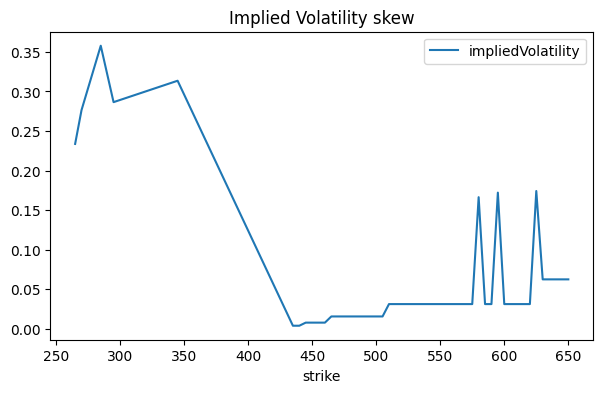

In [57]:
#Seelct an expiration to plot
calls_at_expiry=calls[calls['expiration']== "2025-12-19 23:59:59"]


#fliter out low vols with implied volatitlities (expected volatilities of the options viewed by the market)
filtered_calls_at_expiry = calls_at_expiry[calls_at_expiry.impliedVolatility >= 0.001]


#set the strike as the index so pandas plots nicely:
filtered_calls_at_expiry[['strike',"impliedVolatility"]].set_index('strike').plot(
    title='Implied Volatility skew', figsize=(7,4)
)


<Axes: title={'center': 'Implied Volatility Term Structure'}, xlabel='expiration'>

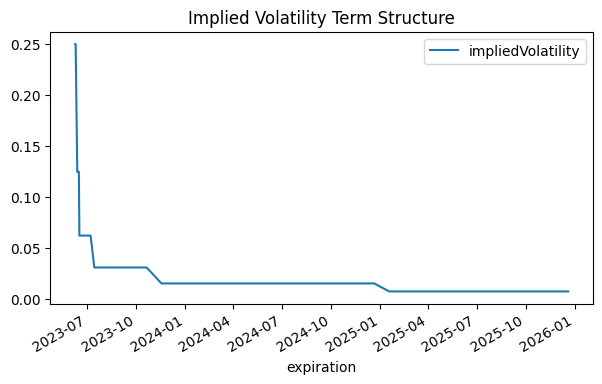

In [58]:
#Seelct an expiration to plot
calls_at_strike=puts[puts['strike']== 400.0]



#fliter out low vols with implied volatitlities (expected volatilities of the options viewed by the market)
filtered_calls_at_strike = calls_at_strike[calls_at_strike.impliedVolatility >= 0.001]


#set the strike as the index so pandas plots nicely:
filtered_calls_at_strike[['expiration',"impliedVolatility"]].set_index('expiration').plot(
    title='Implied Volatility Term Structure', figsize=(7,4)
)


In [55]:
calls_at_strike

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,optionType,expiration,DaysToExpiration
17,SPY230608C00400000,2023-06-07 14:09:40+00:00,400.0,29.00,0.0,0.0,0.0,0.0,2.0,10.0,0.00001,True,REGULAR,USD,call,2023-06-08 23:59:59,1
39,SPY230609C00400000,2023-06-07 19:50:34+00:00,400.0,27.05,0.0,0.0,0.0,0.0,17.0,3282.0,0.00001,True,REGULAR,USD,call,2023-06-09 23:59:59,2
7,SPY230612C00400000,2023-06-06 15:23:43+00:00,400.0,28.16,0.0,0.0,0.0,0.0,10.0,22.0,0.00001,True,REGULAR,USD,call,2023-06-12 23:59:59,5
5,SPY230613C00400000,2023-05-31 13:36:03+00:00,400.0,19.80,0.0,0.0,0.0,0.0,NaN,4.0,0.00001,True,REGULAR,USD,call,2023-06-13 23:59:59,6
4,SPY230614C00400000,2023-06-02 15:20:56+00:00,400.0,28.20,0.0,0.0,0.0,0.0,2.0,2.0,0.00001,True,REGULAR,USD,call,2023-06-14 23:59:59,7
0,SPY230615C00400000,2023-06-07 19:12:51+00:00,400.0,27.33,0.0,0.0,0.0,0.0,2.0,17.0,0.00001,True,REGULAR,USD,call,2023-06-15 23:59:59,8
119,SPY230616C00400000,2023-06-07 19:55:51+00:00,400.0,27.08,0.0,0.0,0.0,0.0,148.0,58680.0,0.00001,True,REGULAR,USD,call,2023-06-16 23:59:59,9
30,SPY230623C00400000,2023-06-06 20:11:42+00:00,400.0,29.20,0.0,0.0,0.0,0.0,9.0,84.0,0.00001,True,REGULAR,USD,call,2023-06-23 23:59:59,16
80,SPY230630C00400000,2023-06-07 18:44:46+00:00,400.0,27.83,0.0,0.0,0.0,0.0,22.0,6681.0,0.00001,True,REGULAR,USD,call,2023-06-30 23:59:59,23
17,SPY230707C00400000,2023-06-05 19:58:05+00:00,400.0,28.96,0.0,0.0,0.0,0.0,2.0,27.0,0.00001,True,REGULAR,USD,call,2023-07-07 23:59:59,30


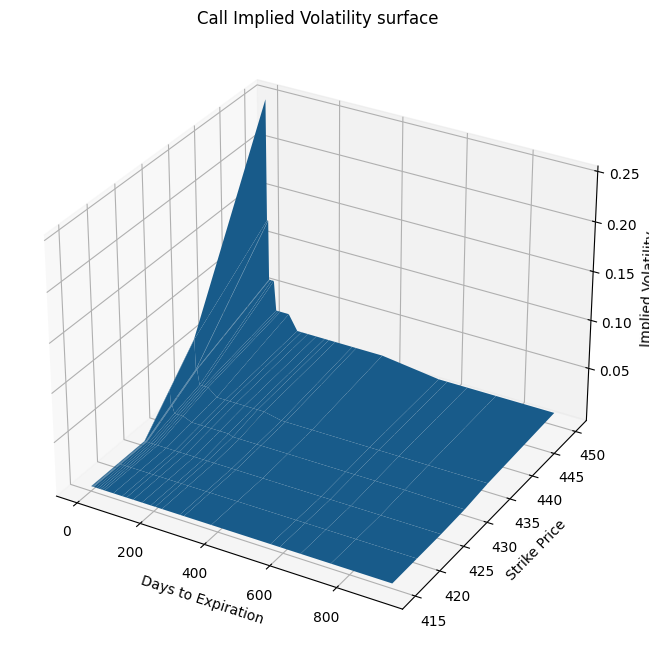

In [69]:
#Pivot the dataframe:
surface= ( 
    calls[['DaysToExpiration','strike','impliedVolatility']]
    .pivot_table(values='impliedVolatility',index='strike',columns='DaysToExpiration')
    .dropna()
)

#Create the figure objects: 
fig=plt.figure(figsize=(10,8))

#add the subplot with projection argument
ax=fig.add_subplot(111,projection='3d')

#get the 1d values from the pivoted dataframe:
x, y ,z=surface.columns.values, surface.index.values, surface.values

#return the cooridnates matrices from coordinate vectors 
X, Y=np.meshgrid(x,y)

#Set labels:
ax.set_xlabel('Days to Expiration')
ax.set_ylabel('Strike Price')
ax.set_zlabel('Implied Volatility')
ax.set_title('Call Implied Volatility surface')

#plot
ax.plot_surface(X,Y,z)

In [70]:
surface

DaysToExpiration,1,2,5,6,7,8,9,16,23,30,...,205,226,282,295,380,562,590,653,744,926
strike,,,,,,,,,,,,,,,,,,,,,
415.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
420.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
425.0,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010
430.0,0.031260,0.031260,0.015635,0.015635,0.015635,0.015635,0.015635,0.007822,0.007822,0.007822,...,0.001963,0.001963,0.001963,0.001963,0.001963,0.001963,0.001963,0.001963,0.001963,0.000987
435.0,0.062509,0.062509,0.031260,0.031260,0.031260,0.031260,0.031260,0.015635,0.015635,0.015635,...,0.007822,0.007822,0.003916,0.003916,0.003916,0.003916,0.003916,0.003916,0.003916,0.003916
450.0,0.250007,0.125009,0.125009,0.125009,0.062509,0.062509,0.062509,0.062509,0.062509,0.031260,...,0.015635,0.015635,0.015635,0.015635,0.015635,0.007822,0.007822,0.007822,0.007822,0.007822


We notice that volatility is much higher at the close expirations and the higher strikes

Implied volatility helps: 
-Calibrate pricing models
-Find market mispricings
-Price exotic derivatives
